<a href="https://colab.research.google.com/github/CoDeRror555/Analytic_projects/blob/main/shop_product_analytics/shop_product_analytics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Анализ результатов А/В тестирования интернет-магазина. Приоритизация гипотез увеличения выручки

# Основные цели:
* **Провести анализ результатов A/B тестирования**
* **Принять решение о дальнейших действиях на основе результатов**
* **Провести приоритизацию гипотез увелечения выручки посредствам фреймворков ICE и RICE**
 ## Решённые задачи:
 - [x] **Проведена приоритизация гипотез методами ICE и RICE**
 - [x] **Проверены гипотезы о наличии статистически значимых различий
  в показателях конверсии и среднего чека между группами теста при помощи критерия Манна - Уитни**
 - [x] **Подведен итог и даны рекомендации**
### Используемые инструменты:
   * *python, numpy, pandas, matplotlib, scipy*
* **

In [1]:
# работа с таблицами
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


# статистика
from scipy import stats as stats
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# загрузим данные
# global case
hypotises = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/uBKPAZXR0aZuJg',index_col=0)
orders = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/tBefuoK6eFnmIQ',index_col=0)
visitors = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/ip7ypnSQWaktwA',index_col=0)


In [3]:
# функция для получения иныфо о данных
def df_info(df:pd.DataFrame) -> None:
    '''Распечатывает информацию о датафрейме'''
    print(f"Количество полных дубликатов: {df.duplicated().sum()}")
    print('****************')

    # Выводим инфо
    df.info()


    # Сохраняем пропуски
    df_nans = np.trim_zeros(df.isna().mean().sort_values())

    if len(df_nans > 0):
        print('\nNA:',end='')
        display(df_nans)

    # Пример данных
    display(df.dropna().sample().T)

    for col in df.columns:
        if df[col].nunique() < 20:
            display(df[col].value_counts())

# Приоритизация гипотез

In [4]:
# посмотрим на данные
display(hypotises)

,Reach,Impact,Confidence,Efforts
Hypothesis,,,,
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [5]:
# рассчитам показатели фреймворков ICE
hypotises['ICE'] = round((hypotises.Impact *
                    hypotises.Confidence) / hypotises.Efforts,1)

In [6]:
# посмотрим на результаты ICE
hypotises.sort_values(by='ICE',ascending = False)

,Reach,Impact,Confidence,Efforts,ICE
Hypothesis,,,,,
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0


* **В лидерах по приоритету попали гипотезы с высокими значениями impact и confidence и средней ценой реализации этих гипотез, однако мы можем заметить что на первой строчке стоит гипотеза с очень низким охватом пользователей, что дает нам основания посчитать приоритеты фреймворком RICE для учета этого фактора.**

In [7]:
# рассчитам показатели фреймворков RICE
hypotises['RICE'] = round((hypotises.Impact* hypotises.Confidence*hypotises.Reach)/hypotises.Efforts,1)

In [8]:
# посмотрим на результаты RICE
hypotises.sort_values(by='RICE',ascending = False)

,Reach,Impact,Confidence,Efforts,ICE,RICE
Hypothesis,,,,,,
"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.2,112.0
"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.0,56.0
"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.3,40.0
"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.0,40.0
"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.2,16.2
"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.1,9.0
"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.0,4.0
"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.3,4.0
"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.0,3.0


* **После подсчета приоритетов методом RICE гипотеза, затрагивающее максимальное количество пользователей с довольно сильным влиянием и уверенностью в ее успехе которая имеет среднюю цену проверки поднялась на первую строчку относительно 3, которую она занимала по методу ICE. Тогда как гипотезы с низким охватом пользователей сместилась вниз. Это можно объяснить тем что параметр RICE учитывает помимо силы еще один важный параметр - охват пользователей.**

# A/B тестирование

## Предобработка данных

In [9]:
# посмотрим на первые 5 строк
visitors.head()

,group,visitors
date,,
2019-08-01,A,719
2019-08-02,A,619
2019-08-03,A,507
2019-08-04,A,717
2019-08-05,A,756


In [10]:
# вернем дату из индекса
visitors = visitors.reset_index()

In [11]:
# проверим данные
df_info(visitors)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


,33
date,2019-08-03
group,B
visitors,509


A    31
B    31
Name: group, dtype: int64

In [12]:
# приведем дату к верному формату
visitors['date'] = visitors.date.astype('datetime64[D]')

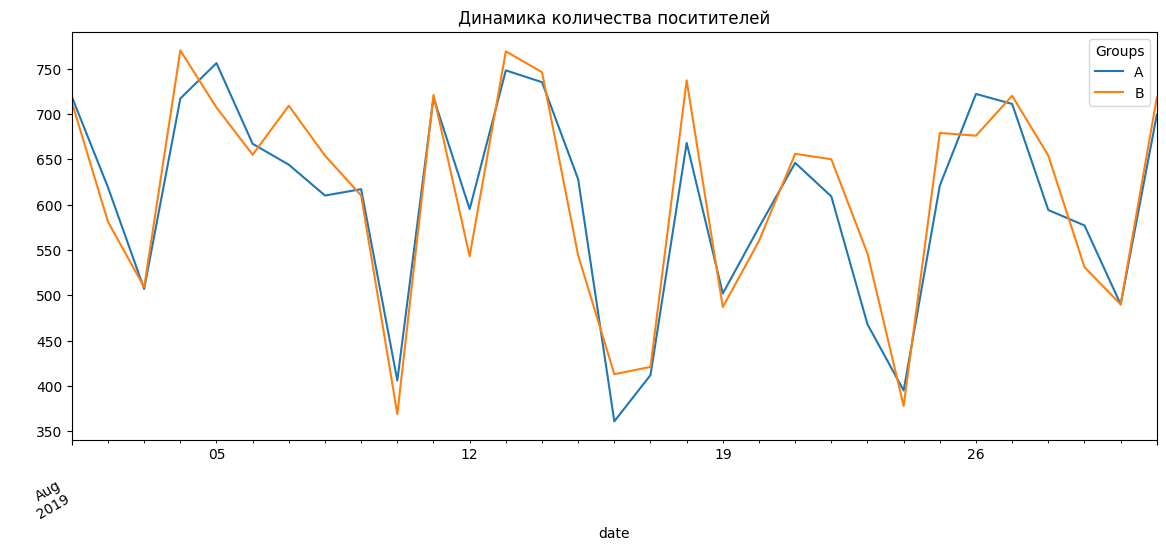

In [13]:
# посмотрим на динамику количества поситителей
ax = visitors.groupby(by=['group','date'],as_index = False).mean().query("group =='A'").plot(x = 'date',y = 'visitors',figsize=(14,6))
visitors.groupby(by=['group','date'],as_index = False).mean().query("group =='B'").plot(x = 'date',y = 'visitors',ax = ax)
plt.legend(['A','B'], title='Groups')
plt.gcf().autofmt_xdate()
plt.title('Динамика количества поситителей')
plt.show(ax)

In [14]:
print(visitors.date.min(),'-',visitors.date.max())

2019-08-01 00:00:00 - 2019-08-31 00:00:00


* **Дубликатов и пропусков нет. Количество посетителей циклически менялось в течение месяца подобным образом в обеих группах без явной динамики. Тест проходил на протяжении августа месяца, что может поставить под сомнение его результаты ввиду изменения потребительской активности перед началом учебного сезона**

In [15]:
# проверим таблицу с заказами
orders.head()

,visitorId,date,revenue,group
transactionId,,,,
3667963787,3312258926,2019-08-15,1650,B
2804400009,3642806036,2019-08-15,730,B
2961555356,4069496402,2019-08-15,400,A
3797467345,1196621759,2019-08-15,9759,B
2282983706,2322279887,2019-08-15,2308,B


In [16]:
# вернем ключ транзакций из индекса
orders =  orders.reset_index()

In [17]:
# Проверим данные
df_info(orders)

Количество полных дубликатов: 0
****************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


,828
transactionId,1029192242
visitorId,570540961
date,2019-08-30
revenue,2690
group,B


B    640
A    557
Name: group, dtype: int64

In [18]:
# приведем дату к верному формату
orders['date'] = orders.date.astype('datetime64[D]')

In [19]:
# проверим период дат
print(orders.date.min(),'-',orders.date.max())

2019-08-01 00:00:00 - 2019-08-31 00:00:00


* **Пропусков и дубликатов нет. Количество транзакций группы B на более чем на 15% выше группы A**

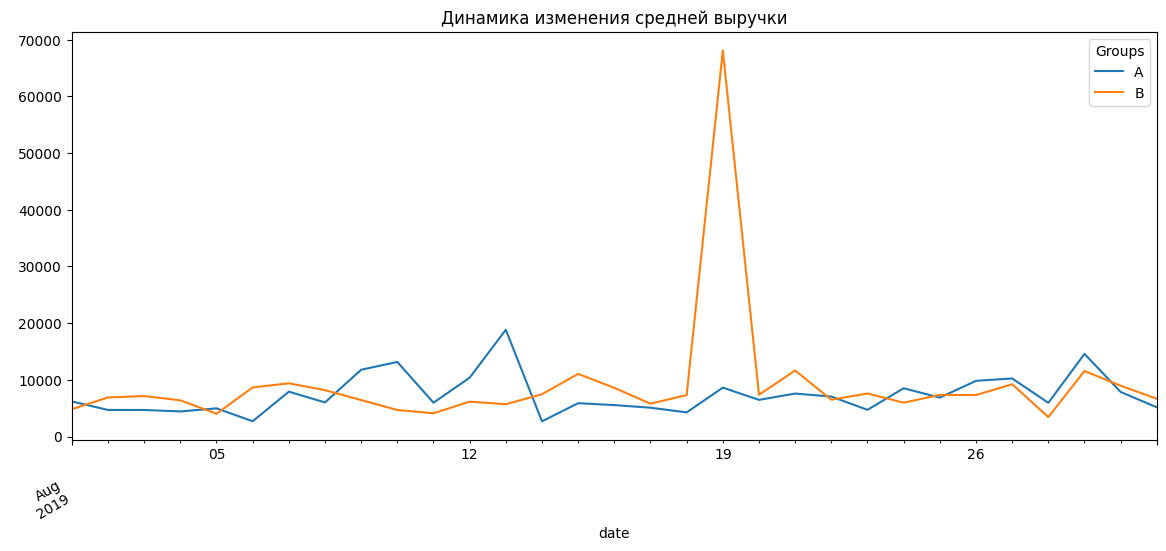

In [20]:
# посмотрим на изменение среднего чека по группам на протяжении теста
ax = orders.groupby(by=['group','date'],as_index = False).mean().query("group =='A'").plot(x = 'date',y = 'revenue',figsize=(14,6))
orders.groupby(by=['group','date'],as_index = False).mean().query("group =='B'").plot(x = 'date',y = 'revenue',ax = ax)
plt.legend(['A','B'], title='Groups')
plt.title("Динамика изменения средней выручки")
plt.gcf().autofmt_xdate()
plt.show(ax)

* **можно заметить аномальный выброс по среднему показателю выручи в группе B что может исказить результаты теста. Необходимо выяснить причину столь высокой выручки в эту дату. Без учета этой аномалии показатели средней выручки колебались около среднего значения без четкой динамики и явного лидера**

In [21]:
# проверим группы на пересечение уникальных пользователей
A = orders.query("group == 'A'" ).visitorId
cross_users = orders.query("group =='B' and visitorId in @A").visitorId.unique()
len(orders.query("group =='B' and visitorId in @A").visitorId.unique())

58

* **Можно заметить что 58 уникальных пользователей были в обеих группах, что может исказить результаты теста.**

In [22]:
# проверим долю этих пользователей по группам
orders.query("visitorId in  @cross_users").groupby(by ='group').nunique()[['visitorId']]/orders.query("visitorId  not in  @cross_users").groupby(by ='group').nunique()[['visitorId']]

,visitorId
group,
A,0.130337
B,0.109848


In [23]:
# проверим долю транзакций этих пользователей по группам
orders.query("visitorId in  @cross_users").groupby(by ='group').count()[['transactionId']]/orders.query("visitorId  not in  @cross_users").groupby(by ='group').count()[['transactionId']]

,transactionId
group,
A,0.190171
B,0.167883


* **Пересекающиеся пользователи составляют 13 и 11 процентов от общего их числа  в группах A и B соответственно, они совершили 19 и 17 процентов транзакций. Это довольно высокие показатели которые ставят под сомнение результаты теста, также у нас нет возможности удалить пересекающихся пользователей из обеих таблиц ввиду отсутствия их id в таблице visitors. Для более привильноги и глубокого анализа целесообразнее использовать не агрегированную таблицу с поситителями где будут сохранены их id**

# Вывод по итогам предобработки:
* **Дубликатов и пропусков в данных не обнаружено**

* **Количество посетителей циклически менялось в течение месяца подобным образом в обеих группах без явной динамики**
* **Тест проходил на протяжении августа месяца, что может поставить под сомнение его результаты ввиду изменения потребительской активности перед началом учебного сезона**
* **Количество транзакций группы B на более чем на 15% выше группы A, что может подтолкнуть к мысли о более высокой общей конверсии в ней**
* **Обнаружен аномальный выброс по среднему показателю выручи в группе B что может исказить результаты теста. Необходимо выяснить причину столь высокой выручки в эту дату. Без учета этой аномалии показатели средней выручки колебались около среднего значения без четкой динамики и явного лидера**
* **Можно заметить что 58 уникальных пользователей были в обеих группах, что может исказить результаты теста.**
* **Пересекающиеся пользователи составляют 13 и 11 процентов от общего их числа  в группах A и B соответственно, они совершили 19 и 17 процентов транзакций. Это довольно высокие показатели которые ставят под сомнение результаты теста, также у нас нет возможности удалить пересекающихся пользователей из обеих таблиц ввиду отсутствия их id в таблице visitors. Для более плевельного и глубокого анализа целесообразнее использовать не агрегированную таблицу с посетителями где будут сохранены их id**

## Анализ кумулятивных метрик по результатам теста

### Соберем данные из двух таблиц и посчитаем кумулятивные показатели

In [24]:
# create gata_grop_unique dataset
datesGroups = orders[['date','group']].drop_duplicates()

# cereate ord_aggregated dataframe
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']).sort_values(by=['date','group'])

# create visitors aggregated dataframe
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']).sort_values(by=['date','group'])


# create cululative data table
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

print(cumulativeData.head(10))

        date group  orders  buyers  revenue  visitors
0 2019-08-01     A      24      20   148579       719
1 2019-08-01     B      21      20   101217       713
2 2019-08-02     A      44      38   242401      1338
3 2019-08-02     B      45      43   266748      1294
4 2019-08-03     A      68      62   354874      1845
5 2019-08-03     B      61      59   380996      1803
6 2019-08-04     A      84      77   425699      2562
7 2019-08-04     B      78      75   489567      2573
8 2019-08-05     A     109     100   549917      3318
9 2019-08-05     B     101      98   581995      3280


### Построим график кумулятивной выручки по группам теста

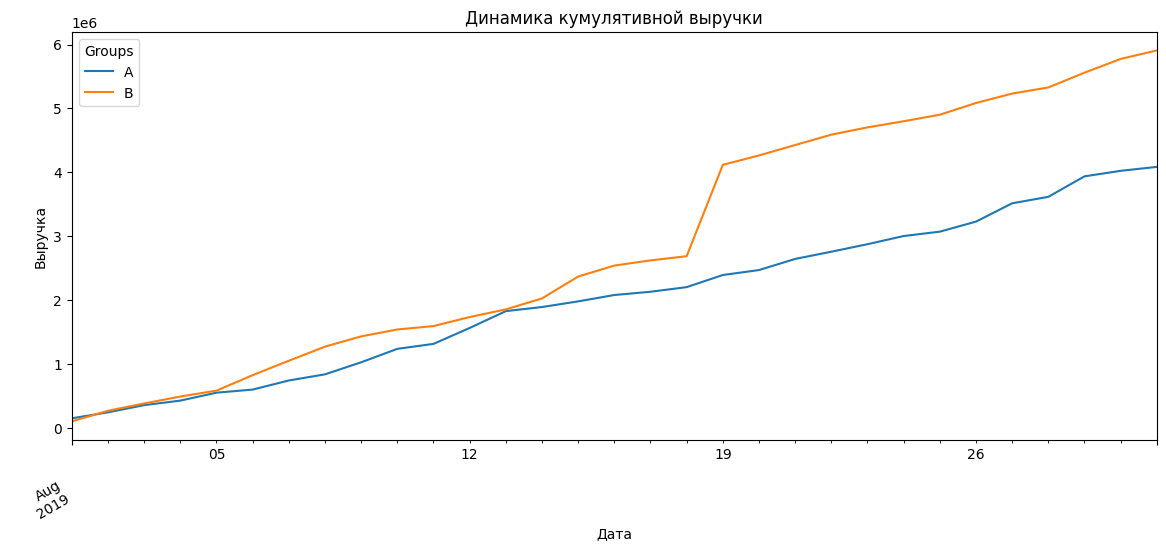

In [25]:
# построим график
ax = cumulativeData.query("group =='A'").plot(x = 'date', y = 'revenue', figsize=(14,6))
cumulativeData.query("group =='B'").plot(x = 'date', y = 'revenue',ax = ax)
plt.legend(['A','B'],title = 'Groups')

plt.title('Динамика кумулятивной выручки')
plt.xlabel('Дата')
plt.yticks(fontsize=10)
plt.ylabel('Выручка')
plt.yticks(rotation=0)

plt.gcf().autofmt_xdate()
plt.show(ax)

* **Кумулятивный показатель выручки стабильно растет, с незначительным превышением в группе B. Однако в середине теста можно заметить резкий всплеск показателя, который судя по всему вызван аномально дорогим заказом или заказами**

### Построим кумулятивный график среднего чека на заказ по группам

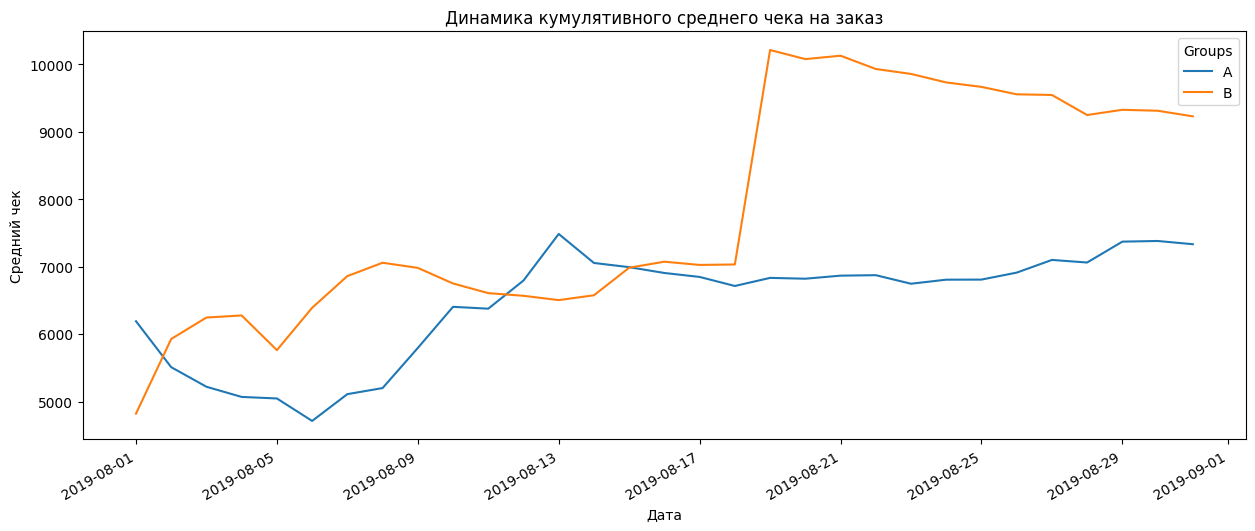

In [26]:
# выделим данные и построим график
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

plt.figure(figsize=(15,6))
ax = plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.legend(['A','B'],title = 'Groups')
plt.title('Динамика кумулятивного среднего чека на заказ')
plt.xlabel('Дата')
plt.yticks(fontsize=10)
plt.ylabel('Средний чек')
plt.yticks(rotation=0)

plt.gcf().autofmt_xdate()
plt.show(ax)

* **На графике можно заметить нестабильный показатель среднего чека по всему периоду теста, причем до 19 числа мы видим волнообразные изменения в обеих группах без явного лидера, далее резкий скачок в группе B 19 числа ввиду аномальной покупки с последующим плавным спадом до конца теста. Тогда как в группе A после 18 числа нет явной динамики и аномалий и лишь небольшой плавный рост под конец теста.**

### Построим график относительного изменения кумулятивного среднего чека группы B к группе A.

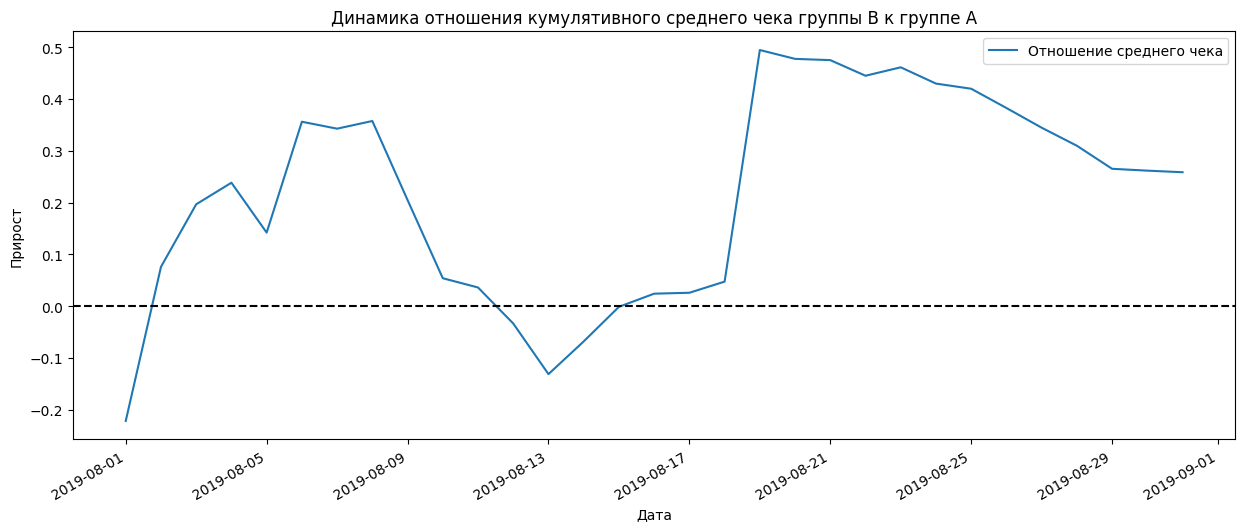

In [27]:
ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

cumulativeRevenueA = cumulativeData[cumulativeData['group'] == 'A'][
    ['date', 'revenue', 'orders']
]
cumulativeRevenueB = cumulativeData[cumulativeData['group'] == 'B'][
    ['date', 'revenue', 'orders']
]

# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.legend(["Отношение среднего чека"])
plt.title('Динамика отношения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.yticks(fontsize=10)
plt.ylabel('Прирост')
plt.yticks(rotation=0)
plt.gcf().autofmt_xdate()
plt.show(ax)

* **На графике нет явного лидера, метрики не стабильны, к тому же видна аномальная покупка 19 числа**

###  Построим график кумулятивного среднего количества заказов на посетителя по группам

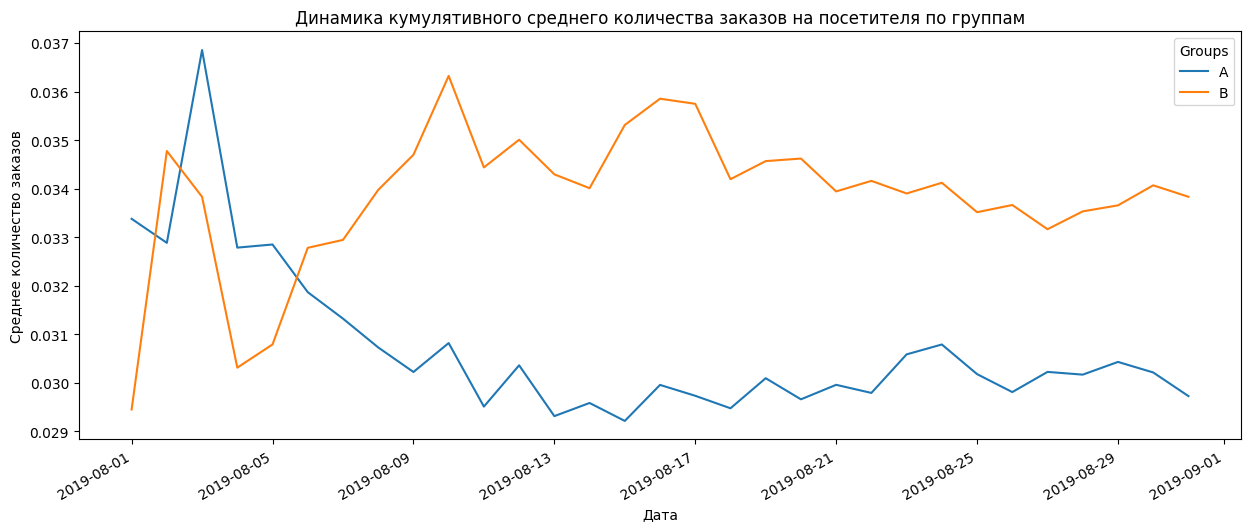

In [28]:
# считаем кумулятивную конверсию
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.figure(figsize=(15,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend(['A','B'],title = 'Groups')
plt.title('Динамика кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.yticks(fontsize=10)
plt.ylabel('Среднее количество заказов')
plt.yticks(rotation=0)
plt.gcf().autofmt_xdate()
plt.show(ax)
# задаем масштаб осей

* **В первую неделю показатели среднего количества заказов на посетителя очень нестабильны, далее мы наблюдаем относительную их стабилизацию и явное превышение показателя в группе B до конца всего теста**

### Построим график отношения среднего количества заказов на посетителя группы В к группе А

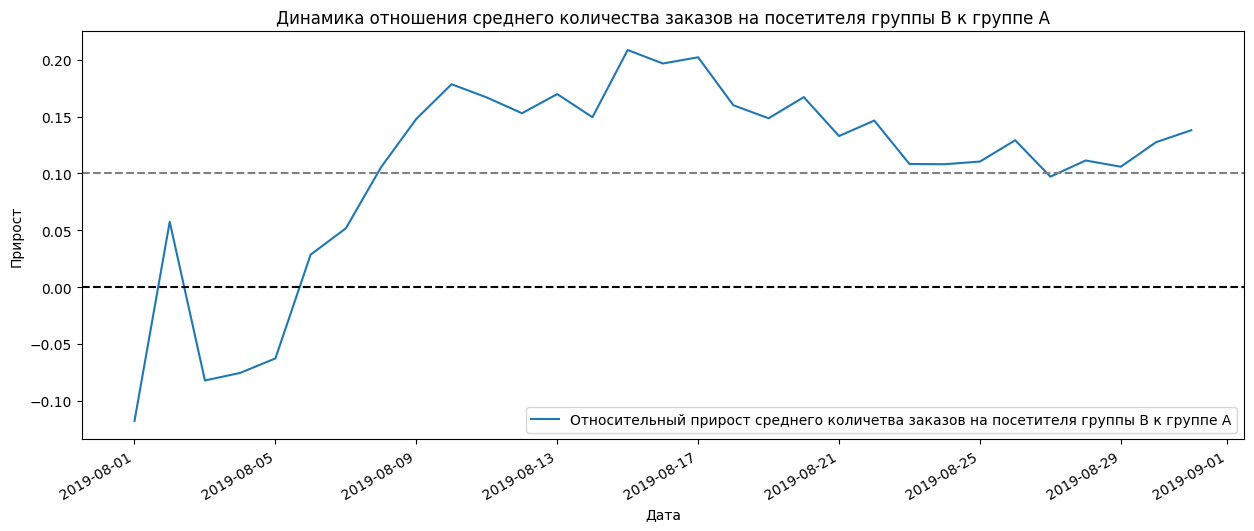

In [29]:
# выделим данные и построим график
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(15,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y = 0.1, color='grey', linestyle='--')
plt.legend(['Относительный прирост среднего количетва заказов на посетителя группы В к группе А'])
plt.title('Динамика отношения среднего количества заказов на посетителя группы В к группе А')
plt.xlabel('Дата')
plt.yticks(fontsize=10)
plt.ylabel('Прирост')
plt.yticks(rotation=0)
plt.gcf().autofmt_xdate()
plt.show(ax)

* **На графике отношения среднего количества заказов на посетителя группы В к группе А видно увеличение показателя после первой нестабильной недели теста с последующей стабилизации на уровне 10 процентов.**

### Построим график распределения количества заказов на пользователя по общей выборке

          userId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


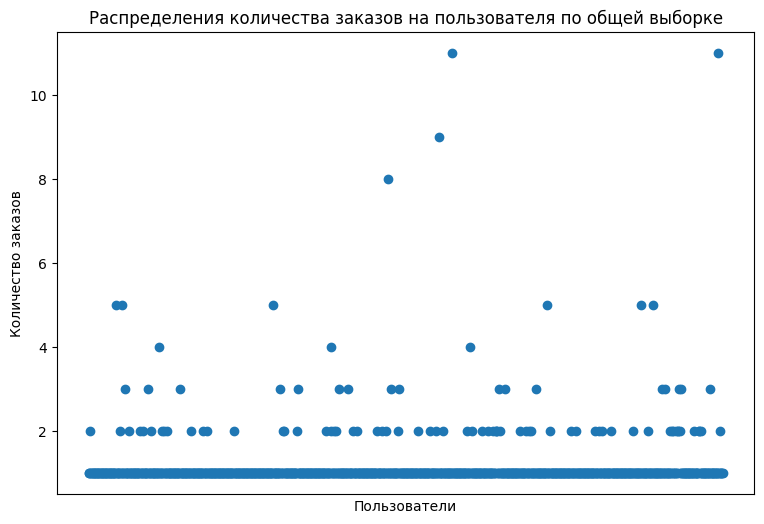

In [30]:
# выделим данные и построим графиг
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)
ordersByUsers.columns = ['userId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))

plt.figure(figsize=(9,6))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Распределения количества заказов на пользователя по общей выборке')
plt.xlabel('Пользователи')
plt.xticks([])
plt.yticks(fontsize=10)
plt.ylabel('Количество заказов')
plt.yticks(rotation=0)

plt.show()

* **На графике видно, что основная часть пользователей делает от одного до 3 заказов, количество пользователей которые делают выше 4 заказов встречаются крайне редко**

In [31]:
# виделим 90, 95 и 99 перцентели
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 2. 4.]


* **По результатам анализа количества заказов мы можем заметить, что основная часть покупателей совершает 1 или 2 покупки, значения выше 4 крайне редки и их доля около 1 процента поэтому их можно принять за выбросы**

###  Построим график распределения стоимости заказов

In [32]:
orders.revenue.describe()

count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

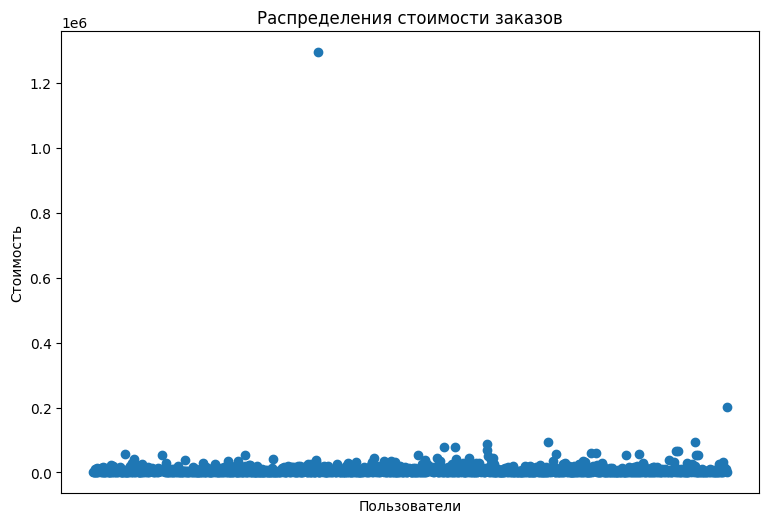

In [33]:
# строим график
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(9,6))
plt.scatter(x_values, orders.revenue)

plt.title('Распределения стоимости заказов')
plt.xlabel('Пользователи')
plt.yticks(fontsize=10)
plt.xticks([])
plt.ylabel('Стоимость')
plt.yticks(rotation=0)

plt.show()

* **Мы видим два очень дорогих заказа из-за чего график стал мелоинформативен**

In [34]:
# виделим 90, 95 и 99 перцентели
print(np.percentile(orders['revenue'], [90, 95, 99]))

[18168.  28000.  58233.2]


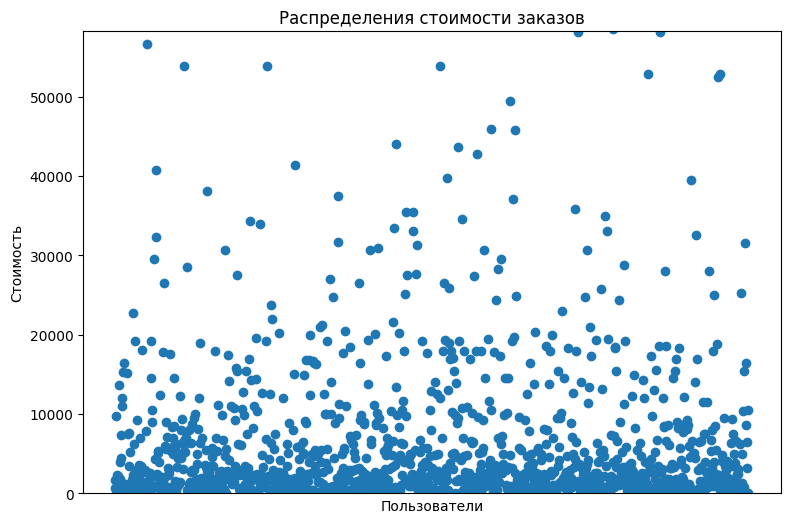

In [35]:
# строим график без выбрасов
x_values = pd.Series(range(0, len(orders['revenue'])))

plt.figure(figsize=(9,6))
plt.scatter(x_values, orders.revenue)

plt.title('Распределения стоимости заказов')
plt.xlabel('Пользователи')
plt.yticks(fontsize=10)
plt.xticks([])
plt.ylim([0, np.percentile(orders['revenue'], [99])])
plt.ylabel('Стоимость')
plt.yticks(rotation=0)

plt.show()

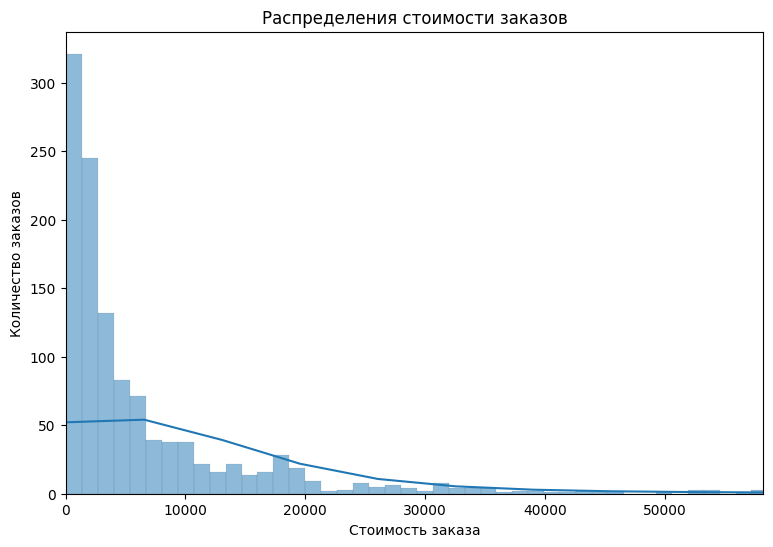

In [36]:
# строим график без выбрасов
import seaborn as sns


plt.figure(figsize=(9,6))

sns.histplot(x = orders['revenue'],kde = True)
plt.title('Распределения стоимости заказов')
plt.xlabel('Стоимость заказа')
plt.yticks(fontsize=10)
plt.xlim([0, np.percentile(orders['revenue'], [99])])

plt.ylabel('Количество заказов')
plt.yticks(rotation=0)

plt.show()

* **По итогам анализа распределения стоимоти заказов мы можем заметить, что число заказов снижатеся с увеличением их стоимости, так же присутствует единичный очень большой выброс, который мы уже наблюдали на графиках выше. Необходимо выяснить причину его появления,  так как его природа больше похожа на ошибку в данных. Основная чать заказов не превышает 82900**

## Проверка гипотезы о статистической значимости различий между группами теста при помощи критерия Манна - Уитни


H0 - различий в выборках нет
****
H1 - присутствуют статистически значимые различия
****
alpha = 0.05

### Проверка гипотезы о различии количества заказов на посетителя между группами. Сырые данные

H0 - различий количества заказов на посетителя между группами нет
****
H1 - присутствуют статистически значимые различия количества заказов на посетителя между группами
****

критический уровень значимости alpha = 0.05

In [37]:
# выделим данные
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]
# сформируем таблицу с метриками
data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

# проверим таблицу
display(data.head(5))

# выделим данные для семплов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders']


# готовим семплы
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)


# провидем тест
print(f"p уровень значимости равен: {round(stats.mannwhitneyu(sampleA, sampleB)[1],3)}")
print(f"Относительный прирост показателя группы B к группе A равен: {round(sampleB.mean() / sampleA.mean() - 1,3)}")

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


p уровень значимости равен: 0.017
Относительный прирост показателя группы B к группе A равен: 0.138


* **По результатам теста мы видим, что уровень статистической значимости меньше выбранного значения alpha, поэтому у нас есть достаточные основания отвергнуть H0 гипотезу. Значит количество заказов на посетителя значительно отличается между группами причем группа B имеет прирост порядка 14%. Данные содержат выбросы и проблемы в формировании групп.**

In [38]:
data.head()

,date,ordersPerDateA,revenuePerDateA,ordersPerDateB,revenuePerDateB,ordersCummulativeA,revenueCummulativeA,ordersCummulativeB,revenueCummulativeB,visitorsPerDateA,visitorsPerDateB,visitorsCummulativeA,visitorsCummulativeB
0,2019-08-01,24,148579,21,101217,24,148579,21,101217,719,713,719,713
1,2019-08-02,20,93822,24,165531,44,242401,45,266748,619,581,1338,1294
2,2019-08-03,24,112473,16,114248,68,354874,61,380996,507,509,1845,1803
3,2019-08-04,16,70825,17,108571,84,425699,78,489567,717,770,2562,2573
4,2019-08-05,25,124218,23,92428,109,549917,101,581995,756,707,3318,3280


### Проверка гипотезы о различии показателя среднего чека заказа между группами. Сырые данные

H0 - различий показателя среднего чека заказа между группами нет
****
H1 - присутствуют статистически значимые различия показателя среднего чека заказа между группами
****

критический уровень значимости alpha = 0.05

In [39]:

# провидем тест
print(f"P уровень значимости равен: {round(stats.mannwhitneyu(orders.loc[orders['group']=='A']['revenue'], orders.loc[orders['group']=='B']['revenue'])[1],3)}")
print(f"Относительный прирост показателя группы B к группе A равен: {round(orders.loc[orders['group']=='B']['revenue'].mean() / orders.loc[orders['group']=='A']['revenue'].mean() - 1,3)}")

P уровень значимости равен: 0.729
Относительный прирост показателя группы B к группе A равен: 0.259


* **По результатам теста мы не можем отвергнуть нулевою гипотезу и утверждать о наличии статистически значимых различий в показатели среднего чека между группами, несмотря на наличие существенного превышения среднего чека в группе B на 26%. В данных содержатся выбросы, они и повлияли на превышение средних показателей.**

### Выделим аномальных пользователей, которые делали много заказов либо они были очень дорогими. Границу аномалий посчитаем 99 процентиль

In [40]:
# выделим пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > np.percentile(ordersByUsers['orders'], [99])[0]]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > np.percentile(ordersByUsers['orders'], [99])[0]]['visitorId'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > np.percentile(orders['revenue'], [99])[0]]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display(abnormalUsers.head(5))
print(f"Число плохих пользователей: {abnormalUsers.shape[0]}")



1099     148427295
949      887908475
744      888512513
1103    1164614297
1136    1307669133
Name: visitorId, dtype: int64

Число плохих пользователей: 15


* **Получилось 15 пользователей**

In [41]:
# посчитаем долю заказов этими пользователями по группам
orders.query("visitorId in @abnormalUsers").groupby(by='group').count().transactionId/orders.query("visitorId not in @abnormalUsers").groupby(by='group').count().transactionId

group
A    0.052930
B    0.038961
Name: transactionId, dtype: float64

* **Плохие пользователи совершили 5 и 4 процента заказов в группах A и B соответственно, поэтому их можно убрать без ущерба для результатов теста**

### Проверка гипотизы о различии количества заказов на посетителя между группами. Чистые данные

H0 - различий показателя количества заказов на посетителя между группами нет
****
H1 - присутствуют статистически значимые различия показателя количества заказов на посетителя между группами
****

критический уровень значимости alpha = 0.05

In [42]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)


print(f"P уровень значимости равен: {round(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1],3)}")
print(f"Относительный прирост показателя группы B к группе A равен: {round(sampleBFiltered.mean()/sampleAFiltered.mean()-1,3)}")

P уровень значимости равен: 0.014
Относительный прирост показателя группы B к группе A равен: 0.153


* **По результатам теста мы видим, что уровень статистической значимости меньше выбранного значения alpha, поэтому у нас есть достаточные основания отвергнуть H0 гипотезу, уровень количества заказов на посетителя значительно отличается между группами причем группа B имеет его прирост порядка 15%. Результаты статистиче6ского анализа количества заказов на посетителя по очищенным данным имеют несущественные отличия от результатов сырых данных ввиду того что аномальные покупатели имели малую долю в группах.**

### Проверка гипотизы о различии показателя среднего чека заказа между группами. Чистые данные

H0 - различий в показателе среднего чека заказа между группами нет
****
H1 - присутствуют статистически значимые различия в показателе среднего чека заказа между группами
****

критический уровень значимости alpha = 0.05

In [44]:
# проведем тест
print('P уровень значимости равен:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)
# проверим относительную разницу
print('Относительный прирост показателя группы B к группе A равен:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)



P уровень значимости равен: 0.851
Относительный прирост показателя группы B к группе A равен: -0.006


* **По результатам теста мы не можем отвергнуть нулевою гипотезу и утверждать о наличии статистически значимых различий в показатели среднего чека между группами теста с очищенными данными. Уровень p-value подрос относительно сырых данных до 0.85, тогда как относительная разница устремилась к 0, что еще раз подтверждает выводы об отсутствии различий меду выборками. Мы можем сделать вывод о том что наличие выбросов пагубно сказывается на точности результатов статистического анализа.**

In [45]:
# посчитаем относительный прирост выручки на уникального поситителя за весь период теста
rev = orders.groupby(by='group').sum().revenue/orders.groupby(by='group').nunique().visitorId
round((rev[1]/rev[0])-1,2)

0.24

# Вывод по результатам A/B теста:
****
## Проблемы подготовки и проведения теста:
* **Тест проведен в августе когда наблюдается определенные изменения в потребительской активности покупателей перед началом учебного сезона, что может исказить результат**
* **При формировании групп существенная часть покупателей пересекаются между ними, что может исказить результаты анализа**
* **Обнаружено аномально большое значение выручки '2019-08-19' в 1294500**
****
## Результаты теста:
* **Обнаружено статистически значимое различие по уровню количества заказов на посетителя между группами, причем ее прирост относительно группы A составил порядка 15%**
* **Статистически значимых различий по размеру среднего чека между группами нет**
****
## Итог и рекомендации:
* **Тест необходимо остановить**
* **Результаты статистического анализа частично можно поставить под сомнение из-за проблем с его организацией**
* **Относительно валидными можно посчитать результаты статистических тестов количества заказов на посетителя группы В и группы А и размеру их средних чеков**
* **Выручка на уникального покупателя в группе В увеличилась на 24% за весь период теста за счет увеличения количества заказов на посетителя в последней на 15%**
* **Будет целесообразным при повторении данного теста устранить проблемы организации и использовать не агрегированную таблицу посетителей, содержащую их id для более точного и глубокого анализа**